<a href="https://colab.research.google.com/github/Airmareing/ML_for_Solar_Power_Forecasting/blob/main/LinearRegression%26%26HistGradientBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HistGradientBoosting Regressor - https://spec-zone.ru/scikit_learn/modules/generated/sklearn.ensemble.histgradientboostingregressor

ПРОГНОЗ РАДИАЦИИ

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


(1866,)
Root Mean Squared Error (RMSE): 0.0567545161018137


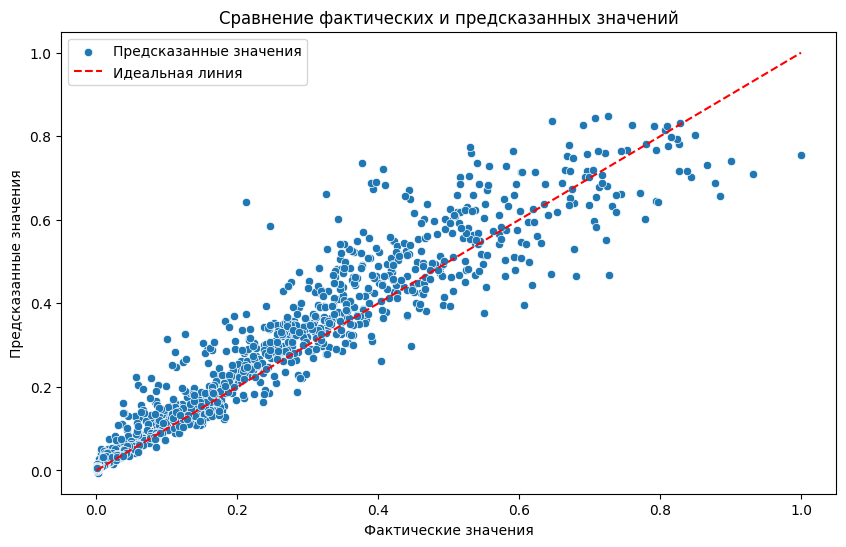

interactive(children=(IntSlider(value=0, description='index', max=1858), Output()), _dom_classes=('widget-inte…

<function __main__.plot_graph(index)>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('pv_01.csv', sep=';')

# Целевая переменная - 'SolarRadiationDiffuseAt0'
X = df.drop(['SolarRadiationGlobalAt0', 'SolarRadiationDirectAt0', 'SolarRadiationDiffuseAt0', 'power_normed'], axis=1)
y = df['SolarRadiationDiffuseAt0']

# Разделение на обучающий и тестовый наборы данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20, shuffle=False)

# Инициализация и обучение модели
model = HistGradientBoostingRegressor(max_iter=100, random_state=42)
model.fit(X_train, y_train)

# Прогнозирование
y_pred = model.predict(X_test)

# Оценка
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(np.shape(y_test))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Визуализация
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, label='Предсказанные значения')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Идеальная линия')
plt.title('Сравнение фактических и предсказанных значений')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.legend()
plt.show()

from ipywidgets import interact, IntSlider

prediction = model.predict(X_test)
max_idx = len(prediction)
hours_per_dot = 3
hours_per_day = 24
dots_per_day = int(hours_per_day / hours_per_dot)

def plot_graph(index):
    x_axis = [x * hours_per_dot for x in range(0, dots_per_day)]
    plt.plot(x_axis, prediction[index : index + dots_per_day], label='prediction', marker='o')
    plt.plot(x_axis, y_test[index : index + dots_per_day], label='actual', marker='o')
    plt.ylabel('SolarRadiationDiffuseAt0')
    plt.ylim(0, 1)
    plt.xlabel('Hours')
    plt.legend()
    plt.show()

interact(plot_graph, index=IntSlider(min=0, max=max_idx - dots_per_day , step=1, value=0))


ПРОГНОЗ МОЩНОСТИ

(1866,)
Root Mean Squared Error (RMSE): 0.06747792356845714


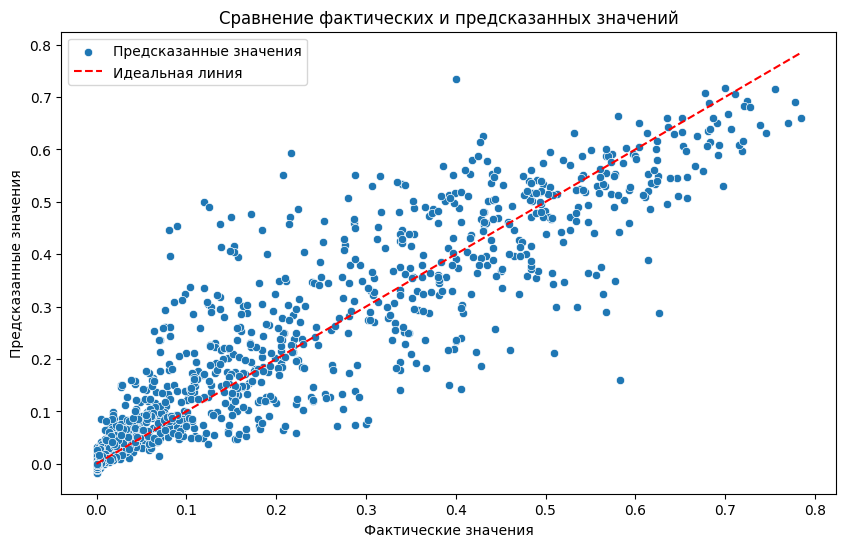

interactive(children=(IntSlider(value=0, description='index', max=1858), Output()), _dom_classes=('widget-inte…

<function __main__.plot_graph(index)>

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('pv_01.csv', sep=';')

# Целевая переменная - 'SolarRadiationDiffuseAt0'
X = df.drop(['SolarRadiationGlobalAt0', 'SolarRadiationDirectAt0', 'SolarRadiationDiffuseAt0', 'power_normed'], axis=1)
y = df['power_normed']

# Разделение на обучающий и тестовый наборы данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20, shuffle=False)

# Инициализация и обучение модели
model = HistGradientBoostingRegressor(max_iter=100, random_state=42)
model.fit(X_train, y_train)

# Прогнозирование
y_pred = model.predict(X_test)

# Оценка
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(np.shape(y_test))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Визуализация
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, label='Предсказанные значения')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Идеальная линия')
plt.title('Сравнение фактических и предсказанных значений')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.legend()
plt.show()

from ipywidgets import interact, IntSlider

prediction = model.predict(X_test)
max_idx = len(prediction)
hours_per_dot = 3
hours_per_day = 24
dots_per_day = int(hours_per_day / hours_per_dot)

def plot_graph(index):
    x_axis = [x * hours_per_dot for x in range(0, dots_per_day)]
    plt.plot(x_axis, prediction[index : index + dots_per_day], label='prediction', marker='o')
    plt.plot(x_axis, y_test[index : index + dots_per_day], label='actual', marker='o')
    plt.ylabel('SolarRadiationDiffuseAt0')
    plt.ylim(0, 1)
    plt.xlabel('Hours')
    plt.legend()
    plt.show()

interact(plot_graph, index=IntSlider(min=0, max=max_idx - dots_per_day , step=1, value=0))


Linear Regressor -https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

ПРОГНОЗ РАДИАЦИИ

Linear Regression - Root Mean Squared Error (RMSE): 0.06289303437218828


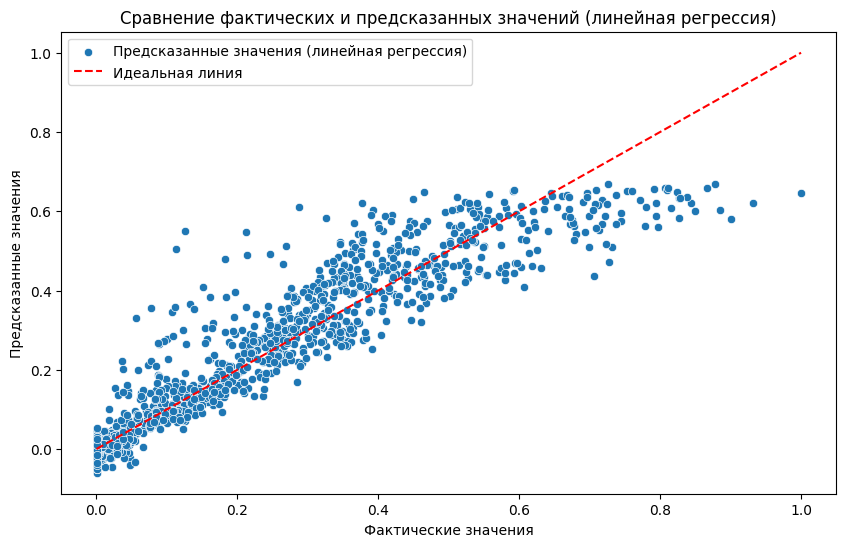

interactive(children=(IntSlider(value=0, description='index', max=1858), Output()), _dom_classes=('widget-inte…

<function __main__.plot_graph(index)>

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('pv_01.csv', sep=';')

# Удаление всех столбцов, содержащих хотя бы одно пропущенное значение
data_cleaned = df.dropna(axis=1)

# Целевая переменная - 'SolarRadiationDiffuseAt0'
X = data_cleaned.drop(['SolarRadiationGlobalAt0', 'SolarRadiationDirectAt0', 'SolarRadiationDiffuseAt0', 'power_normed'], axis=1)
y = data_cleaned['SolarRadiationDiffuseAt0']

# Разделение на обучающий и тестовый наборы данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20, shuffle=False)

# Инициализация и обучение модели
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Прогнозирование
y_pred_linear = linear_model.predict(X_test)

# Оценка
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
print(f'Linear Regression - Root Mean Squared Error (RMSE): {rmse_linear}')

# Визуализация
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_linear, label='Предсказанные значения (линейная регрессия)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Идеальная линия')
plt.title('Сравнение фактических и предсказанных значений (линейная регрессия)')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.legend()
plt.show()

from ipywidgets import interact, IntSlider

prediction = linear_model.predict(X_test)
max_idx = len(prediction)
hours_per_dot = 3
hours_per_day = 24
dots_per_day = int(hours_per_day / hours_per_dot)

def plot_graph(index):
    x_axis = [x * hours_per_dot for x in range(0, dots_per_day)]
    plt.plot(x_axis, prediction[index : index + dots_per_day], label='prediction', marker='o')
    plt.plot(x_axis, y_test[index : index + dots_per_day], label='actual', marker='o')
    plt.ylabel('SolarRadiationDiffuseAt0')
    plt.ylim(0, 1)
    plt.xlabel('Hours')
    plt.legend()
    plt.show()

interact(plot_graph, index=IntSlider(min=0, max=max_idx - dots_per_day , step=1, value=0))

ПРОГНОЗ МОЩНОСТИ

Linear Regression - Root Mean Squared Error (RMSE): 0.08161951159611788


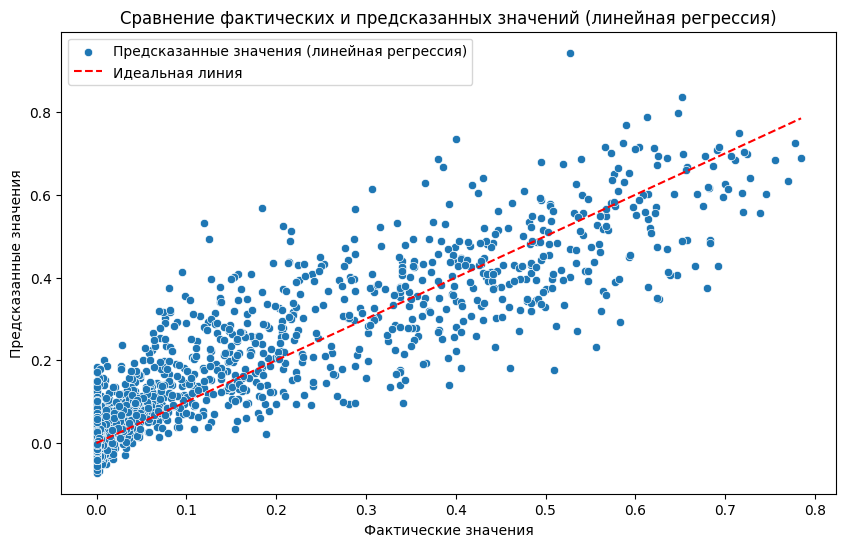

interactive(children=(IntSlider(value=0, description='index', max=1858), Output()), _dom_classes=('widget-inte…

<function __main__.plot_graph(index)>

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('pv_01.csv', sep=';')

# Удаление всех столбцов, содержащих хотя бы одно пропущенное значение
data_cleaned = df.dropna(axis=1)

# Целевая переменная - 'SolarRadiationDiffuseAt0'
X = data_cleaned.drop(['SolarRadiationGlobalAt0', 'SolarRadiationDirectAt0', 'SolarRadiationDiffuseAt0', 'power_normed'], axis=1)
y = data_cleaned['power_normed']

# Разделение на обучающий и тестовый наборы данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20, shuffle=False)

# Инициализация и обучение модели
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Прогнозирование
y_pred_linear = linear_model.predict(X_test)

# Оценка
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
print(f'Linear Regression - Root Mean Squared Error (RMSE): {rmse_linear}')

# Визуализация
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_linear, label='Предсказанные значения (линейная регрессия)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Идеальная линия')
plt.title('Сравнение фактических и предсказанных значений (линейная регрессия)')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.legend()
plt.show()

from ipywidgets import interact, IntSlider

prediction = linear_model.predict(X_test)
max_idx = len(prediction)
hours_per_dot = 3
hours_per_day = 24
dots_per_day = int(hours_per_day / hours_per_dot)

def plot_graph(index):
    x_axis = [x * hours_per_dot for x in range(0, dots_per_day)]
    plt.plot(x_axis, prediction[index : index + dots_per_day], label='prediction', marker='o')
    plt.plot(x_axis, y_test[index : index + dots_per_day], label='actual', marker='o')
    plt.ylabel('SolarRadiationDiffuseAt0')
    plt.ylim(0, 1)
    plt.xlabel('Hours')
    plt.legend()
    plt.show()

interact(plot_graph, index=IntSlider(min=0, max=max_idx - dots_per_day , step=1, value=0))